## 건강검진정보 데이터를 이용한 시각화 실습

In [1]:
import pandas as pd
import platform
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
elif platform.system() == 'Darwin':
    plt.rc('font',family='AppleGothic')
elif platform.system() == 'Linux': #When Using Colab
    !sudo apt-get install -y fonts-nanum
    !sudo fc-cache -fv
    !rm ~/.cache/matplotlib -rf
    plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

원본 데이터

https://www.data.go.kr/data/15007122/fileData.do

In [2]:
df = pd.read_csv('./health_info.csv',encoding="cp949")
df

,성별,연령대,지역,신장(5Cm단위),체중(5Kg단위),BMI,허리둘레,식전혈당(공복혈당),LDL콜레스테롤,감마지티피,흡연상태,혈압분류
0,여,70~74세,대구광역시,150,45,20.0,71.5,100,135,13,1,고혈압
1,남,55~59세,울산광역시,175,65,21.2,80.0,80,103,446,1,고혈압
2,남,60~64세,충청남도,165,85,31.2,98.0,122,111,21,2,주의2
3,여,50~54세,경기도,155,55,22.9,69.0,85,90,12,1,고혈압
4,여,50~54세,부산광역시,150,55,24.4,74.0,92,68,19,1,정상
...,...,...,...,...,...,...,...,...,...,...,...,...
325746,남,35~39세,울산광역시,180,65,20.1,77.0,92,60,15,3,주의2
325747,남,60~64세,서울특별시,155,60,25.0,87.0,82,181,64,3,주의1
325748,여,65~69세,전라남도,155,55,22.9,83.0,99,148,23,1,고혈압
325749,여,65~69세,경상북도,155,55,22.9,84.0,95,148,19,1,주의2


### 연령대, 성별에 따른 평균 신장 시각화
2개 항목에 대한 비교 - Bar Chart

Text(0.5, 0, '연령대')

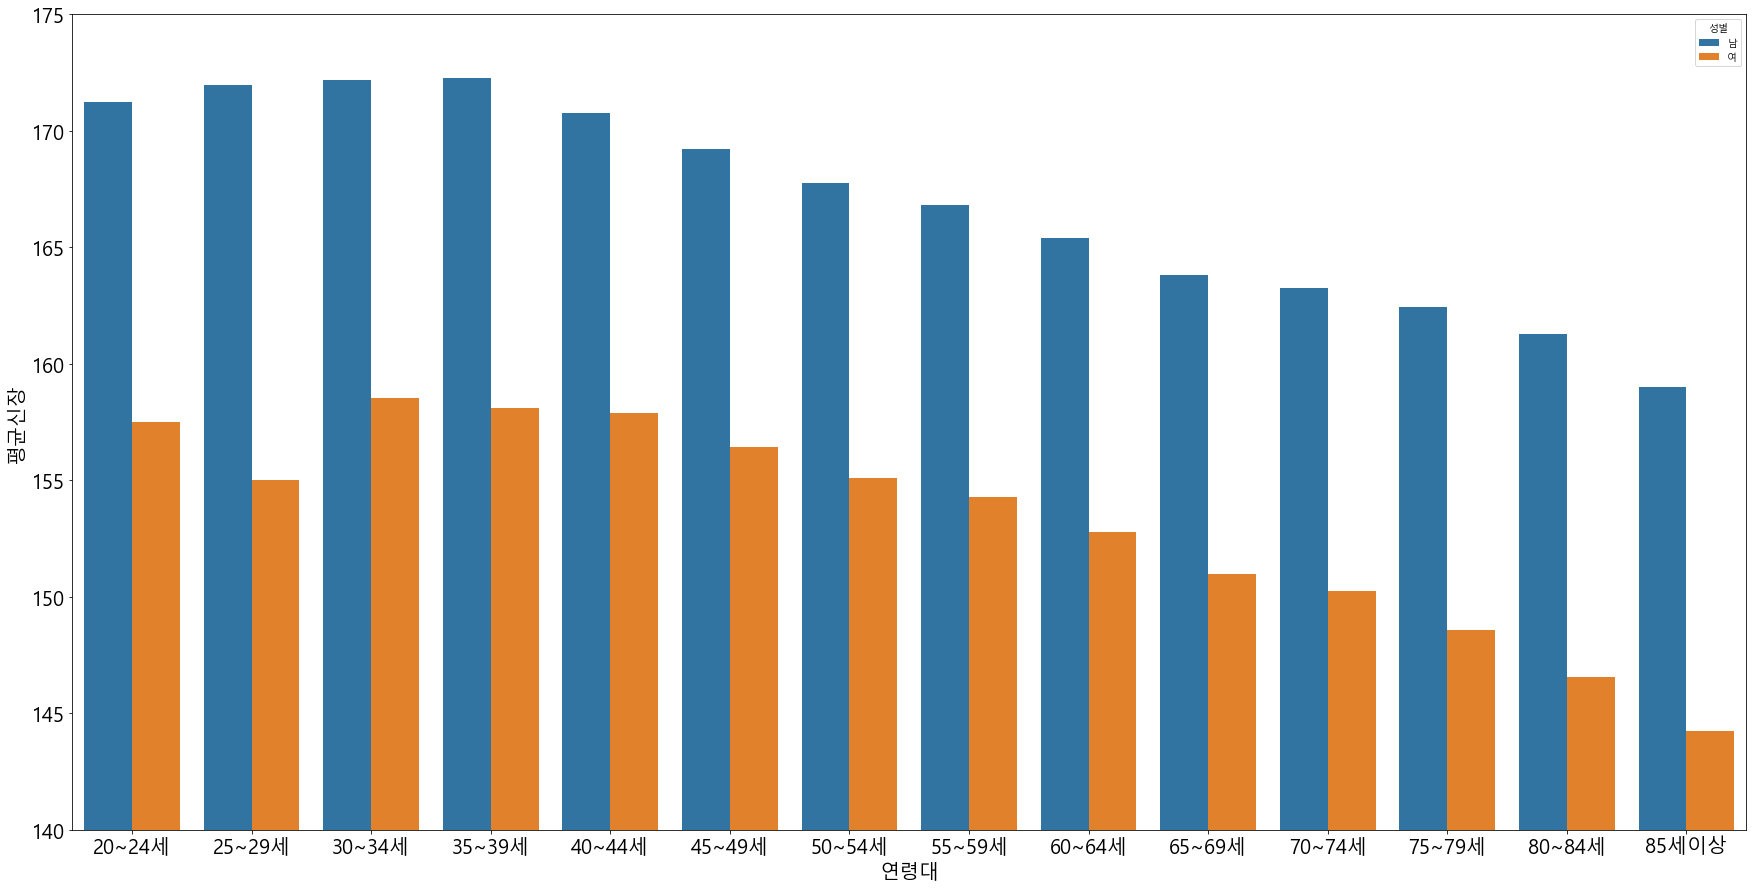

In [3]:
#연령대,성별에 따른 평균 신장 시각화

age_list = []
gender_list = []
height_mean_list =[]

sr=df.groupby(["연령대","성별"])["신장(5Cm단위)"].mean()

for idx in sr.index:
    age_list.append(idx[0])
    gender_list.append(idx[1])

for value in sr.values:
    height_mean_list.append(value)
    
df3 = pd.DataFrame({
    "연령대":age_list,
    "성별":gender_list,
    "평균신장":height_mean_list
})


plt.figure(figsize=(30, 15))
sns.barplot(x="연령대", y="평균신장", hue="성별", data=df3)
plt.ylim([140,175])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("평균신장", fontsize=20)
plt.xlabel("연령대", fontsize=20)


### BMI와 허리둘레에 따른 데이터 분포 시각화
2개 항목에 대한 데이터 분포 - Scatter Chart

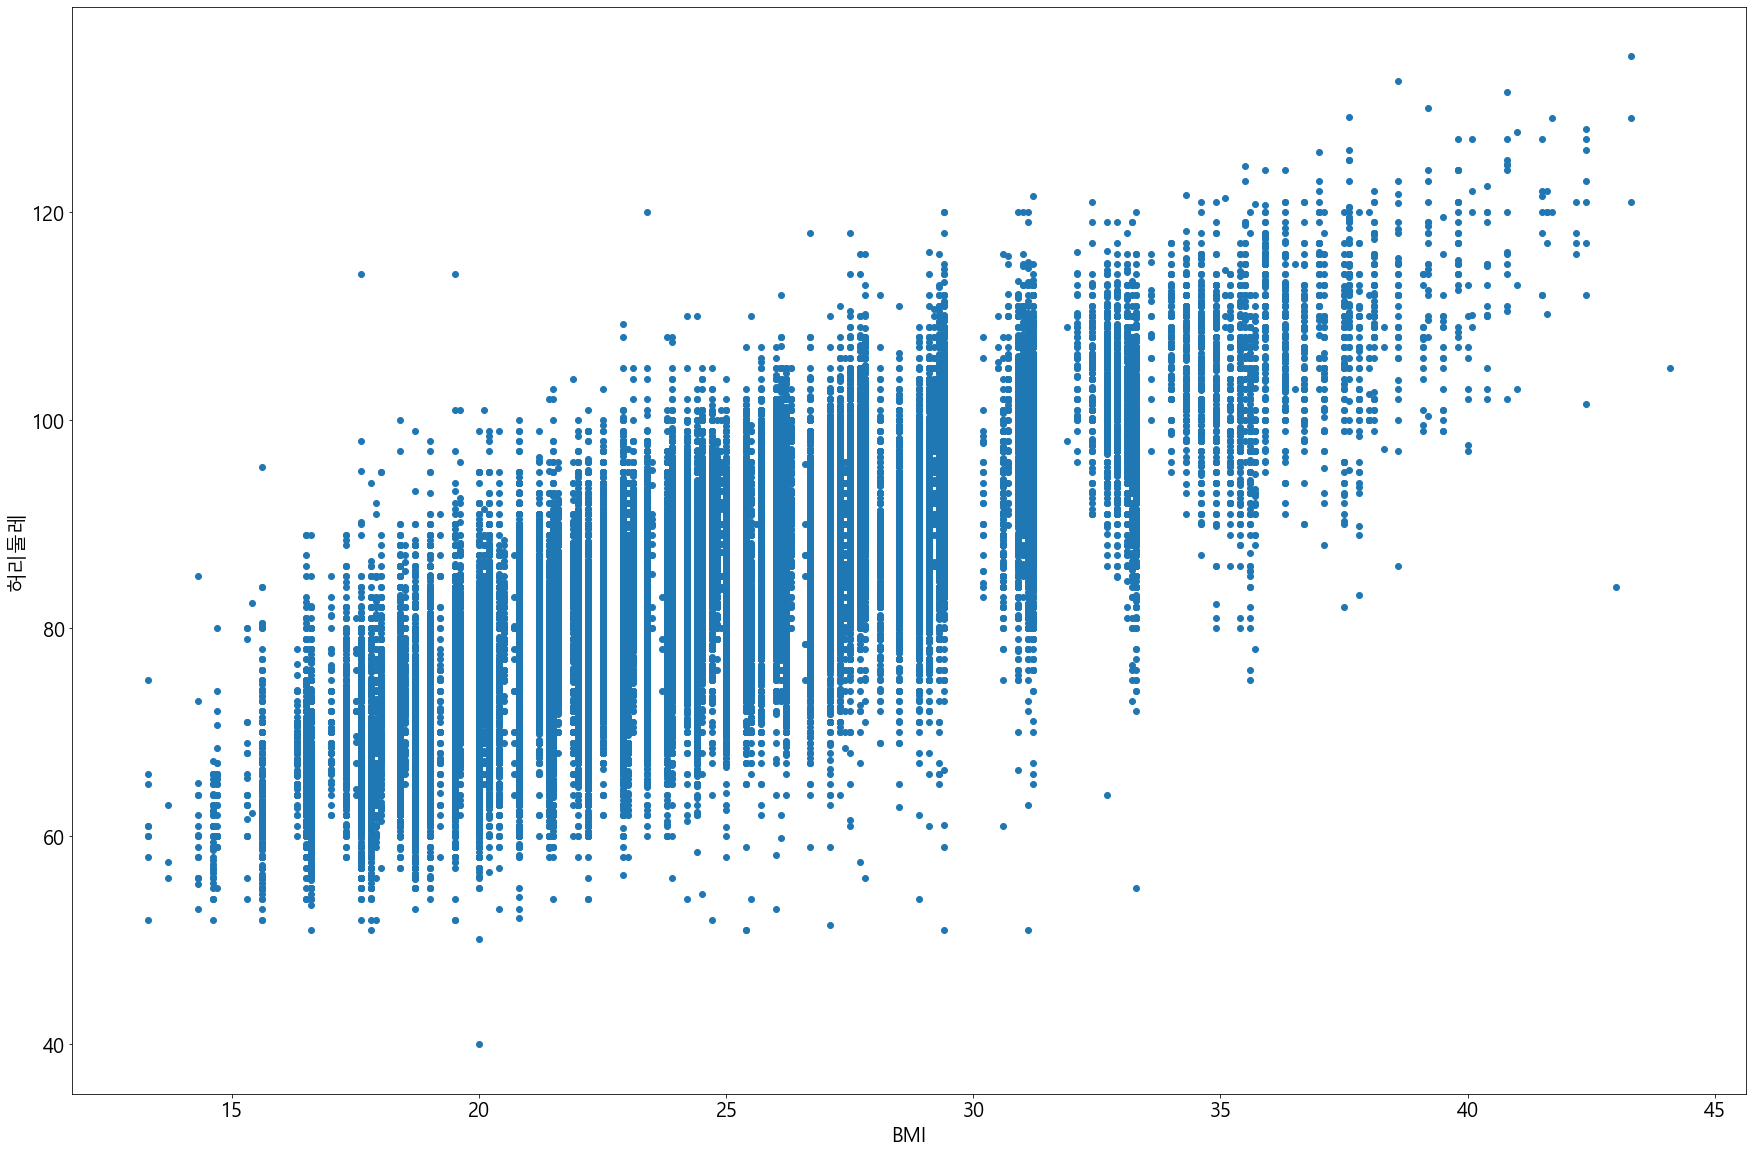

In [4]:
#이상치 제거
cond = (df["허리둘레"] < 40) 
df = df.drop(df[cond].index, axis=0)
df.describe()

x = df["BMI"].values
y = df["허리둘레"].values

plt.figure(figsize=(30,20)) 
plt.xticks(fontsize=20)
plt.xlabel("BMI", fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("허리둘레", fontsize=20)
plt.scatter(x,y)
plt.show()

### 비만인 가운데 혈압 분류별 비율을 시각화
전체 중 일부의 비율 표시 - Pie Chart(원그래프)

In [5]:
cond = df["BMI"] < 20
df.loc[cond, "BMI구분"] = "저체중"

cond = (df["BMI"] >= 20) & (df["BMI"] < 25)
df.loc[cond, "BMI구분"] = "정상"

cond = (df["BMI"] >= 25) & (df["BMI"] < 30)
df.loc[cond, "BMI구분"] = "과체중"

cond = (df["BMI"] >= 30) 
df.loc[cond, "BMI구분"] = "비만"

df['BMI구분'].value_counts()
df

,성별,연령대,지역,신장(5Cm단위),체중(5Kg단위),BMI,허리둘레,식전혈당(공복혈당),LDL콜레스테롤,감마지티피,흡연상태,혈압분류,BMI구분
0,여,70~74세,대구광역시,150,45,20.0,71.5,100,135,13,1,고혈압,정상
1,남,55~59세,울산광역시,175,65,21.2,80.0,80,103,446,1,고혈압,정상
2,남,60~64세,충청남도,165,85,31.2,98.0,122,111,21,2,주의2,비만
3,여,50~54세,경기도,155,55,22.9,69.0,85,90,12,1,고혈압,정상
4,여,50~54세,부산광역시,150,55,24.4,74.0,92,68,19,1,정상,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325746,남,35~39세,울산광역시,180,65,20.1,77.0,92,60,15,3,주의2,정상
325747,남,60~64세,서울특별시,155,60,25.0,87.0,82,181,64,3,주의1,과체중
325748,여,65~69세,전라남도,155,55,22.9,83.0,99,148,23,1,고혈압,정상
325749,여,65~69세,경상북도,155,55,22.9,84.0,95,148,19,1,주의2,정상


['주의2' '고혈압' '정상' '주의1']


([<matplotlib.patches.Wedge at 0x231c9a183a0>,
 [Text(0.248613317584383, 1.071536942116177, '주의2'),
  Text(-0.9684994229657714, -0.5215446938805608, '고혈압'),
  Text(0.3956180737181329, -1.026394826442317, '정상'),
  Text(1.031768752197291, -0.3813833268369832, '주의1')],
 [Text(0.13560726413693616, 0.5844746956997328, '42.74%'),
  Text(-0.5282724125267844, -0.2844789239348513, '30.24%'),
  Text(0.21579167657352702, -0.559851723513991, '15.75%'),
  Text(0.5627829557439769, -0.208027269183809, '11.27%')])

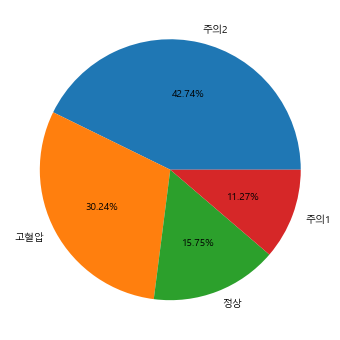

In [6]:
#원그래프 시각화

cond = (df["BMI구분"] == "비만")
df2 = df[cond]

bp_types = df2['혈압분류'].value_counts().index.values
type_counts = df2['혈압분류'].value_counts().values
print(bp_types)
ratios = []
for count in type_counts:
    ratios.append(count/len(df2))

plt.figure(figsize=(10,6))    
plt.pie(ratios, labels=bp_types, autopct='%.2f%%')


### 각 연령대별 혈압 비율 시각화
어떻게 시각화할까? Bar Chart? Pie Chart?

<AxesSubplot:>

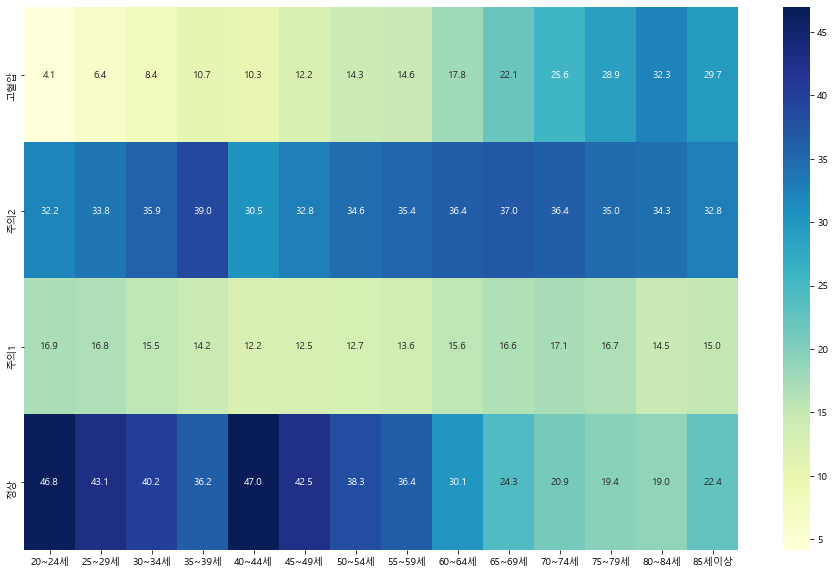

In [7]:
age_type_list = df["연령대"].unique()
#bp_type_list = df["혈압분류"].unique()
bp_type_list = ['정상','주의1','주의2','고혈압']
count_list = []

for age_type in age_type_list:
    cond = df["연령대"] == age_type
    sr = (df[cond])["혈압분류"].value_counts()
    total = sr.sum()
    tmp_list = []
    for bp_type in bp_type_list:
        ratio = (sr[bp_type]/total)*100
        tmp_list.append(ratio.round(1))
    count_list.append(tmp_list)

df2 = pd.DataFrame(count_list, index=age_type_list, columns=bp_type_list)

df3 = (df2.sort_index()).T.iloc[::-1]
plt.figure(figsize=(16,10))
sns.heatmap(df3, annot=True, fmt= '.1f', cmap="YlGnBu",yticklabels='auto')
#df3.plot.bar(stacked=True)

### 지역별 고혈압 인구 비율 시각화
Folium을 이용한 지도 시각화 활용

In [8]:
!pip install folium

In [9]:
import json
import folium


region_list = df["지역"].unique()
ratio_list = []

for region in region_list:
    cond = (df["지역"] == region)
    total = len(df[cond])
    high_bp_num = (df[cond]["혈압분류"].value_counts())["고혈압"]
    ratio = high_bp_num/total*100
    ratio_list.append(ratio.round(2))

df2 = pd.DataFrame({"지역명":region_list, "고혈압비율":ratio_list})


geojson_file = './map_korea.geojson'
geo_json = json.load(open(geojson_file, encoding='utf-8'))


for i in range(len(df2)):
    tooltip_text = df2['지역명'][i]+" : "+ str(df2['고혈압비율'][i])+"%"
    for j in range(len(geo_json['features'])):
        if geo_json['features'][j]['properties']['CTP_KOR_NM'] == df2['지역명'][i]:
            geo_json['features'][j]['properties']['tooltip1'] = tooltip_text

korea_map = folium.Map(
    location = [36.654957, 127.769162],   #좌표 값은 구글맵으로 구한다!
    tiles = 'Stamen Terrain',
    zoom_start = 7
)

choropleth=folium.Choropleth(
    geo_data = geo_json,
    data = df2,
    columns = ['지역명','고혈압비율'],
    fill_color='YlOrRd',
    key_on='properties.CTP_KOR_NM',
    highlight=True
).add_to(korea_map)


folium.LayerControl().add_to(korea_map)
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['tooltip1'], labels=False)
)

korea_map